This code is created to Answer Question 1 of Exercise set 1 of RESEARCH METHODS COURSE By Mahmood Hasani .

in The First Cell I am going to import some important libraries such as numpy for matrix operations, matplotlib for sketching data, sympy for making symbolic functions to do calculus, math for some special mathematical functions, pandas for save the output as CSV file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
import sympy
import math
from sympy import lambdify
import pandas as pd

In the next 2 cells We are going to load the data from the uploaded files "x_new" and "y_new"

In [2]:
xData = np.loadtxt("x_new.txt")

In [3]:
yData = np.loadtxt("y_new.txt")

in the next 3 cells we are going to seperate the y and x values and their errors and save them in the seperate numpy arrays

In [4]:
Label = xData[:, 0].astype(int)

In [5]:
xval = xData[:, 1]
xer1 = xData[:, 2]

In [6]:
yval = yData[:, 1]
yer1 = yData[:, 2]

In [7]:
zval = np.tanh(xval**2) + np.exp(yval)

In [8]:
zval

array([ 5.78246695,  8.26279666,  4.54365807,  5.2397204 ,  8.13116016,
       12.64170547, 27.18285024, 15.59070091, 29.66853709,  5.77722897,
       18.65344106, 11.14946691,  6.4963607 , 37.09188415, 25.36986002,
       30.90235406, 12.06749199,  6.72890014,  9.55901822, 10.49372995,
       15.24620988,  8.26479121,  7.07583199, 15.62255771, 40.89425821,
        9.66154978, 15.0724614 , 16.86589002, 30.11964753, 13.17398748,
       35.38573129, 33.83110384, 24.15687672,  8.91787996, 25.87772581,
       18.48761282, 36.66869003, 20.00919229, 20.29143345, 26.00696719,
       13.36845803, 20.18492652, 21.20529186, 12.58661752, 17.13663375,
       49.74109587, 40.82246374, 28.92430618,  9.37025128, 13.97935318,
       12.673499  , 50.07349208, 47.55317894, 27.88083707, 22.90761971,
       39.14978615, 16.40165924, 10.84984229, 54.77295958, 16.52155871,
       27.5484336 , 29.54963402, 54.52685168, 13.68181941, 32.35770952,
       55.01883085, 12.66896314, 49.41751976, 41.4035203 , 27.11

In [9]:
x = Symbol('x')
y = Symbol('y')
z = sympy.tanh(x**2) + sympy.exp(y)

In [10]:
zprimex = z.diff(x)

In [11]:
zprimex

2*x*(1 - tanh(x**2)**2)

In [12]:
zprimey = z.diff(y)

In [13]:
zprimey

exp(y)

In [14]:
zx = lambdify(x, zprimex, 'numpy')
zy = lambdify(y, zprimey, 'numpy')

In [15]:
zx1 = zx(xval)
zy1 = zy(yval)

In [16]:
dz = np.sqrt((((zx1)**2) * (xer1**2)) + (((zy1)**2) * (yer1**2)))

In [17]:
dz

array([ 0.71871765,  0.57603045,  1.63239358,  1.80323007,  1.34801691,
        0.36633058, 10.97540075,  1.63544601, 12.57234558,  2.27871447,
        2.90371045,  1.2159832 ,  2.42004729, 17.73131576,  6.96135195,
       11.34678125,  1.38924088,  2.64892529,  2.29859567,  2.1261527 ,
        0.40045698,  2.69232295,  2.83190116,  0.400389  , 18.48680999,
        2.4937856 ,  0.52162352,  0.35838249,  9.09405883,  1.59733762,
       13.18993092, 11.4710878 ,  3.68108623,  2.98161105,  5.10561557,
        0.10360263, 12.56988463,  0.87394169,  0.73742481,  4.59836443,
        2.37630173,  0.46937703,  0.96894988,  2.68957619,  1.13882838,
       23.23901647, 14.85560565,  5.36478437,  3.45986429,  2.55728982,
        2.95372426, 22.67757094, 20.70050367,  4.18082212,  1.443968  ,
       12.44893547,  1.85124303,  3.46491004, 26.56369433,  1.75242218,
        3.62789405,  5.01072608, 26.49754718,  2.87553021,  6.93306142,
       25.95083133,  3.29860215, 20.59624812, 13.03948447,  2.66

In [18]:
df = pd.DataFrame({'Label' : Label, 'Value' : zval, 'Error' : dz})

In [19]:
df.set_index('Label')

,Value,Error
Label,,
1,5.782467,0.718718
2,8.262797,0.576030
3,4.543658,1.632394
4,5.239720,1.803230
5,8.131160,1.348017
...,...,...
96,11.393644,4.124333
97,10.646769,4.305184
98,14.662574,3.745857


In [20]:
df.to_csv('Question1-Mahmood Hasnai')

Text(0.5, 1.0, 'z values with green color and its error bars indicated in red color')

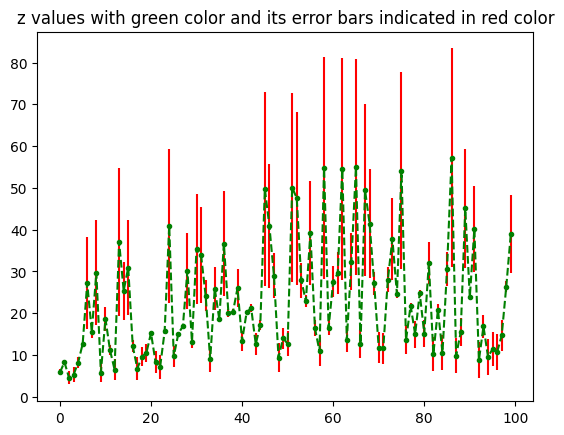

In [37]:
plt.errorbar(range(0, len(zval)), zval, dz, ecolor = 'red',fmt='--',marker = '.', color = 'green')
plt.title('z values with green color and its error bars indicated in red color')